# Preparing data

### Mount drive 

In [1]:
def mount_drive():
  from google.colab import drive
  drive.mount('/content/drive/')

mount_drive()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Imports

In [2]:
import cv2
import numpy as np
import pandas as pd
import scipy
import pickle
import random
import os
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from imutils import paths
from sklearn.metrics import classification_report



from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


Load Data

In [0]:
#load data
#list paths
# grab the list of images that we'll be describing
from imutils import paths

dataset_path = "/content/drive/My Drive/Kaggle/Sign-Language-Digits-Dataset-master/Dataset"

print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))

[INFO] loading images...


In [0]:
len(imagePaths)

2072

In [0]:
def load(imagePaths):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split("/")[-2]
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (64, 64),interpolation=cv2.INTER_AREA)
			
			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [0]:
data,labels = load(imagePaths)

Load stored numpy data

In [3]:
data = np.load("/content/drive/My Drive/Kaggle/Sign-Language-Digits/Sign-Language-Digits-data.npy")
labels = np.load("/content/drive/My Drive/Kaggle/Sign-Language-Digits/Sign-Language-Digits-labels.npy")

print(data.shape,labels.shape)

(2072, 64, 64, 3) (2072, 1)


In [0]:
labels=labels.reshape(-1,1)

print(data.shape,labels.shape)

(2072, 64, 64, 3) (2072, 1)


Test random label and image

In [0]:
data_backup,label_backup = data,labels

In [0]:
data_flattern = data.reshape(2072,12288)

print(data_flattern.shape)

(2072, 12288)


### In order to avoid time consuming data loading time save it in a file while first load (load once and use many times)

In [0]:
np.save("/content/drive/My Drive/Kaggle/Sign-Language-Digits-data",data)
np.save("/content/drive/My Drive/Kaggle/Sign-Language-Digits-labels",labels)

In [0]:
X = data_flattern
Y = labels 

X,X_test,Y,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# KNN Model

In [0]:
KnnModel = KNeighborsClassifier(n_neighbors=1)

KnnModel.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
res=KnnModel.predict(X_test[10].reshape(1,-1))
# print(res)
print(res,Y_test[10])

['5'] ['5']


In [0]:
predictions =  KnnModel.predict(X_test)

In [0]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.91      0.80      0.85        49
           2       0.45      0.68      0.54        37
           3       0.97      0.62      0.76        45
           4       0.36      0.39      0.37        41
           5       0.72      0.57      0.64        40
           6       0.37      0.52      0.43        42
           7       0.41      0.43      0.42        37
           8       0.76      0.67      0.71        39
           9       0.82      0.68      0.74        40

    accuracy                           0.64       415
   macro avg       0.67      0.63      0.64       415
weighted avg       0.69      0.64      0.65       415



# LogisticRegression

In [0]:
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import imutils
import cv2
import sklearn

In [0]:
model = LogisticRegression()
model.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        45
           1       0.95      0.86      0.90        49
           2       0.57      0.62      0.60        37
           3       0.86      0.84      0.85        45
           4       0.61      0.56      0.58        41
           5       0.86      0.93      0.89        40
           6       0.50      0.52      0.51        42
           7       0.60      0.73      0.66        37
           8       0.71      0.74      0.72        39
           9       0.84      0.65      0.73        40

    accuracy                           0.73       415
   macro avg       0.73      0.73      0.73       415
weighted avg       0.74      0.73      0.73       415



#Neural Network on Sign_language digits

In [0]:
# Create MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# data

print(X.shape,Y.shape)

print(X[0].shape,Y[0].shape)

from keras.utils import to_categorical
y_binary = to_categorical(Y)
print(y_binary.shape)

(1657, 12288) (1657, 1)
(12288,) (1,)
(1657, 10)


In [0]:
#label encoder



In [0]:
# 1Feature extractor
def extract_features(image, vector_size=32):
    #image = imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print
        'Error: ', e
        return None

    return dsc



(1, 2048) 2072


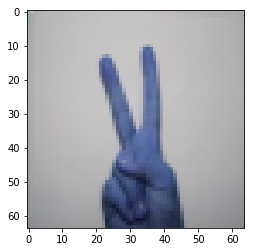

In [0]:
image1 =  data[0]

dsc = extract_features(image1)
print(dsc.reshape(1,-1).shape,data.shape[0])
plt.imshow(image1)

In [0]:


X_feature =[]  

for i in range(data.shape[0]):
  image = data[i]
  dsc = extract_features(image)
  X_feature.append(dsc)
  

print(X_feature)

In [0]:
# data_filtered= np.array(X_feature)
y_binary = to_categorical(labels)
# print(data_filtered)

In [0]:
# create model
NNmodel = Sequential()
NNmodel.add(Dense(2048, input_dim=2048, init='uniform', activation='relu'))
NNmodel.add(Dense(1000, init='uniform', activation='relu'))
NNmodel.add(Dense(500, init='uniform', activation='relu'))
NNmodel.add(Dense(10, init='uniform', activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2048, input_dim=2048, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="uniform")`
  """


In [0]:
NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              2049000   
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
Total params: 6,750,862
Trainable params: 6,750,862
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
NNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = NNmodel.fit(data_filtered, y_binary, nb_epoch=10, batch_size=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
2072/2072 [==============================] - 3s 2ms/step - loss: 1.8042 - acc: 0.3407
Epoch 2/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.9171 - acc: 0.6680
Epoch 3/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.6292 - acc: 0.7814
Epoch 4/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.4323 - acc: 0.8600
Epoch 5/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.3048 - acc: 0.8929
Epoch 6/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.2103 - acc: 0.9339
Epoch 7/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.0995 - acc: 0.9681
Epoch 8/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.1931 - acc: 0.9291
Epoch 9/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.1546 - acc: 0.9522
Epoch 10/10
2072/2072 [==============================] - 3s 1ms/step - loss: 0.0896 - acc: 0.9725


In [0]:
def show_plot(history):

  import matplotlib.pyplot as plt

  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

In [0]:
show_plot(show_plot)

In [0]:
NNmodel.save("/content/drive/My Drive/Kaggle/Sign-Language-Digits/nnmode.h5",)

In [0]:
type(history)
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history)

# or save to csv: 
hist_csv_file = '/content/drive/My Drive/Kaggle/Sign-Language-Digits/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# CNN

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [5]:
data.shape

y_binary = to_categorical(labels)

print(y_binary.shape)

(2072, 10)


## Model

In [16]:
CNNmodel = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


CNNmodel.summary()

CNNmodel.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)        

### predict

In [17]:
# history = 
CNNmodel.fit(x=data, y=y_binary, batch_size=None, epochs=30)

#CNNmodel.save("/content/drive/My Drive/Kaggle/Sign-Language-Digits/CNNmodel.h5")

Epoch 1/30
2072/2072 [==============================] - 1s 720us/sample - loss: 3.9263 - acc: 0.1395
Epoch 2/30
2072/2072 [==============================] - 1s 623us/sample - loss: 1.5275 - acc: 0.4817
Epoch 3/30
2072/2072 [==============================] - 1s 592us/sample - loss: 0.6836 - acc: 0.7722
Epoch 4/30
2072/2072 [==============================] - 1s 596us/sample - loss: 0.4798 - acc: 0.8480
Epoch 5/30
2072/2072 [==============================] - 1s 593us/sample - loss: 0.3993 - acc: 0.8755
Epoch 6/30
2072/2072 [==============================] - 1s 585us/sample - loss: 0.2852 - acc: 0.9242
Epoch 7/30
2072/2072 [==============================] - 1s 597us/sample - loss: 0.2431 - acc: 0.9233
Epoch 8/30
2072/2072 [==============================] - 1s 602us/sample - loss: 0.2606 - acc: 0.9247
Epoch 9/30
2072/2072 [==============================] - 1s 599us/sample - loss: 0.2033 - acc: 0.9421
Epoch 10/30
2072/2072 [==============================] - 1s 600us/sample - loss: 0.1993 - a

dict_keys(['loss', 'acc'])


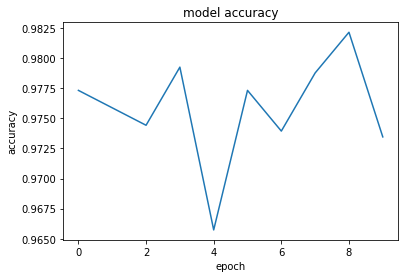

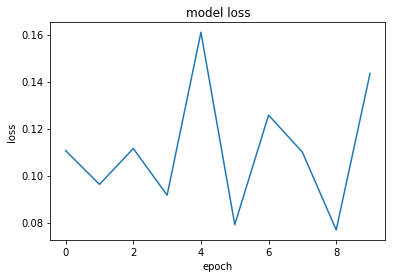

In [19]:
show_plot(history)